<a href="https://colab.research.google.com/github/susanavenda/data_cambridge/blob/main/ai_bench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ⬛ **Statistical Identification Activity**

This template is designed for you to test your ability to match **Business Problems** to the correct **Statistical Tests** and **Visualizations**.




https://github.com/susanavenda/data_cambridge/blob/main/README.md

In [29]:
#first I need my libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### **Scenario 2: The Multi-City Delivery Study**

* **The Context:** A logistics firm wants to know if delivery times differ across four major cities: London, Paris, Berlin, and Madrid.
* **Data Points:**
* **Independent Variable (X):** City (4 Categories)
* **Dependent Variable (Y):** Delivery Duration (Hours)


* **Your Task:**
1. **Identify the Test:** ________________
2. **Define :** ________________
3. **Choose the Plot:** ________________


In [30]:
def generate_delivery_dataset(n_samples_per_city=30):

    np.random.seed(42)

    cities = ['London', 'Paris', 'Berlin', 'Madrid']

    # Simulating different means and standard deviations for each city
    data = {
        'City': np.repeat(cities, n_samples_per_city),
        'Delivery_Duration_Hours': np.concatenate([
            np.random.normal(loc=24.5, scale=3.2, size=n_samples_per_city), # London
            np.random.normal(loc=26.1, scale=2.8, size=n_samples_per_city), # Paris
            np.random.normal(loc=22.8, scale=2.5, size=n_samples_per_city), # Berlin
            np.random.normal(loc=25.3, scale=3.5, size=n_samples_per_city)  # Madrid
        ])
    }

    df = pd.DataFrame(data)
    # Ensure no negative durations
    df['Delivery_Duration_Hours'] = df['Delivery_Duration_Hours'].clip(lower=1.0)

    # second categorical variable (Weather)
    np.random.seed(42)
    df['Weather'] = np.random.choice(['Sunny', 'Rainy'], size=len(df))

    return df


In [31]:
# generating my dataset
dataset = generate_delivery_dataset()
print(dataset.head())
print("\nSummary Statistics:")
print(dataset.tail())
print(dataset['City'].unique())
print(dataset['City'].value_counts())
# --- Assignment Answers ---
# Identify the Test: One-Way ANOVA
# Define H0: Mean delivery duration is the same for all four cities.
# Choose the Plot: Boxplot or Violin Plot



     City  Delivery_Duration_Hours Weather
0  London                26.089485   Sunny
1  London                24.057554   Rainy
2  London                26.572603   Sunny
3  London                29.373696   Sunny
4  London                23.750709   Sunny

Summary Statistics:
       City  Delivery_Duration_Hours Weather
115  Madrid                26.355416   Rainy
116  Madrid                25.178509   Sunny
117  Madrid                21.209627   Rainy
118  Madrid                29.299880   Rainy
119  Madrid                27.931766   Sunny
['London' 'Paris' 'Berlin' 'Madrid']
City
London    30
Paris     30
Berlin    30
Madrid    30
Name: count, dtype: int64


ANOVA F-statistic: 6.6908
ANOVA p-value:     3.3204e-04


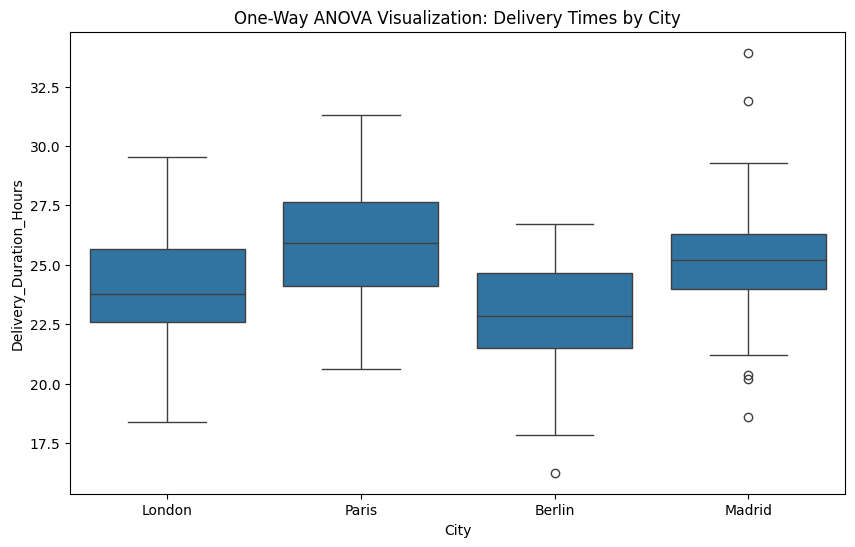


RESULT: Reject H0 - There is a significant difference between cities.


In [32]:
#Significance Gate
#X city Categorical - 4 CAT - London, Paris, Berlin , Madrid
# Y delivery durationn is numerical continuous

# 1. Group the Y-values (Duration) by the X-categories (City)
group_london = dataset[dataset['City'] == 'London']['Delivery_Duration_Hours']
group_paris = dataset[dataset['City'] == 'Paris']['Delivery_Duration_Hours']
group_berlin = dataset[dataset['City'] == 'Berlin']['Delivery_Duration_Hours']
group_madrid = dataset[dataset['City'] == 'Madrid']['Delivery_Duration_Hours']

# 2. Run the One-Way ANOVA
f_stat, p_value = stats.f_oneway(group_london, group_paris, group_berlin, group_madrid)

# 3. Output the Results
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"ANOVA p-value:     {p_value:.4e}") # Using scientific notation for clarity

plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Delivery_Duration_Hours', data=dataset)
plt.title('One-Way ANOVA Visualization: Delivery Times by City')
plt.show()

# 4. Your Significance Gate Logic
alpha = 0.05
if p_value < alpha:
    print("\nRESULT: Reject H0 - There is a significant difference between cities.")
else:
    print("\nRESULT: Fail to Reject H0 - Differences are likely due to random noise.")


In [67]:
#Is there a difference?" to "How big is the effect, and what can I predict?"
#Post-Hoc Analysis and Effect Size Calculation.

#1. Step A: Post-Hoc (The "Where" of the Model)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Build the Post-Hoc Model
tukey = pairwise_tukeyhsd(endog=dataset['Delivery_Duration_Hours'],
                          groups=dataset['City'],
                          alpha=0.05)

print(tukey)

# True results in the final column are a green light. They confirm that the differences between these cities are "Real" (statistically significant)

#Meandiff: This is the "Effect Size." It tells you the literal difference in hours between the two cities.

#Lower/Upper: This is your Confidence Interval. Since the range (e.g., 0.51 to 4.28) does not cross zero, we are 95% confident the difference is real.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Berlin London   1.0657 0.4564 -0.8188 2.9502  False
Berlin Madrid   2.3969 0.0066  0.5124 4.2814   True
Berlin  Paris   2.9285 0.0005   1.044  4.813   True
London Madrid   1.3312 0.2595 -0.5533 3.2157  False
London  Paris   1.8628 0.0539 -0.0217 3.7473  False
Madrid  Paris   0.5316 0.8827 -1.3529 2.4161  False
---------------------------------------------------


Eta-Squared: 0.1475
This means 14.8% of all variation in delivery time is due to the City.


/tmp/ipython-input-2880078955.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='City', y='Delivery_Duration_Hours', palette='viridis', boxprops=dict(alpha=.3))


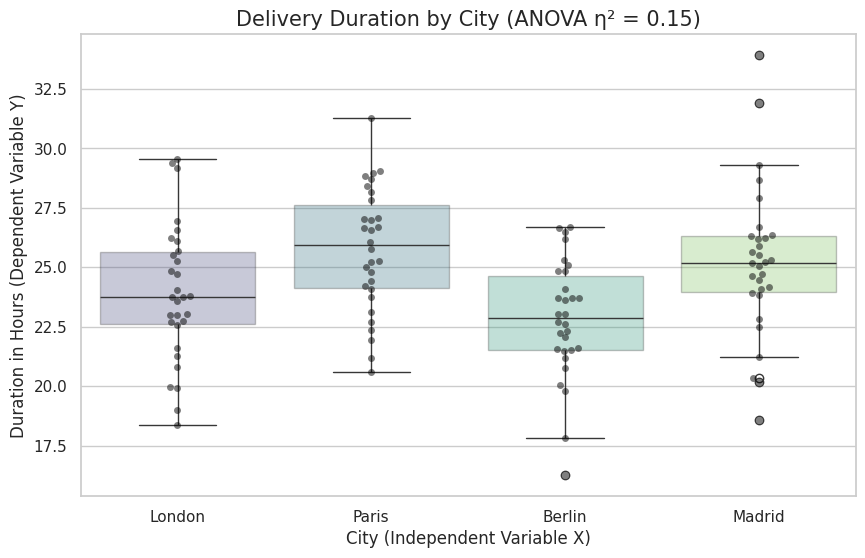

In [46]:
#Building the "Model" (The Next Step)
#Now that you know which cities are different, you "build the model" by quantifying how much of the total delivery variance is explained by the city.
#In your code, we do this by calculating Eta-Squared ($\eta^2$). Think of this as the "R-Squared" for your ANOVA.

import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Re-fit the model to get the Sum of Squares (SS)
model = ols('Delivery_Duration_Hours ~ C(City)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# 2. Calculate Eta-Squared
# Formula: SS_Between / (SS_Between + SS_Within)

ss_between = anova_table['sum_sq'].iloc[0]
ss_resid = anova_table['sum_sq'].iloc[1]
esq = ss_between / (ss_between + ss_resid)

print(f"Eta-Squared: {esq:.4f}")
print(f"This means {esq*100:.1f}% of all variation in delivery time is due to the City.")

#"Statistically Significant but Weak" model.
#If only 14.8% of the delay is caused by which city the package is in, then the remaining 85.2% (the Residuals)
#comes from things your current model isn't looking at yet


# 1. Set the visual style and figure size (10x6 as discussed)
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# 2. Create a Box Plot + Swarm Plot (The "Gold Standard" for ANOVA)
# The Boxplot shows the 'Signal' (Means/Medians)
# The Swarmplot shows the 'Noise' (The 85% Residuals)
sns.boxplot(data=dataset, x='City', y='Delivery_Duration_Hours', palette='viridis', boxprops=dict(alpha=.3))
sns.swarmplot(data=dataset, x='City', y='Delivery_Duration_Hours', color='black', alpha=0.5)

# 3. Add statistical notation manually or just clean titles
plt.title(f'Delivery Duration by City (ANOVA η² = {esq:.2f})', fontsize=15)
plt.xlabel('City (Independent Variable X)', fontsize=12)
plt.ylabel('Duration in Hours (Dependent Variable Y)', fontsize=12)

plt.show()



Shapiro-Wilk Test p-value: 0.4891
Residuals are normal. Your 14.8% Eta-Squared is valid!


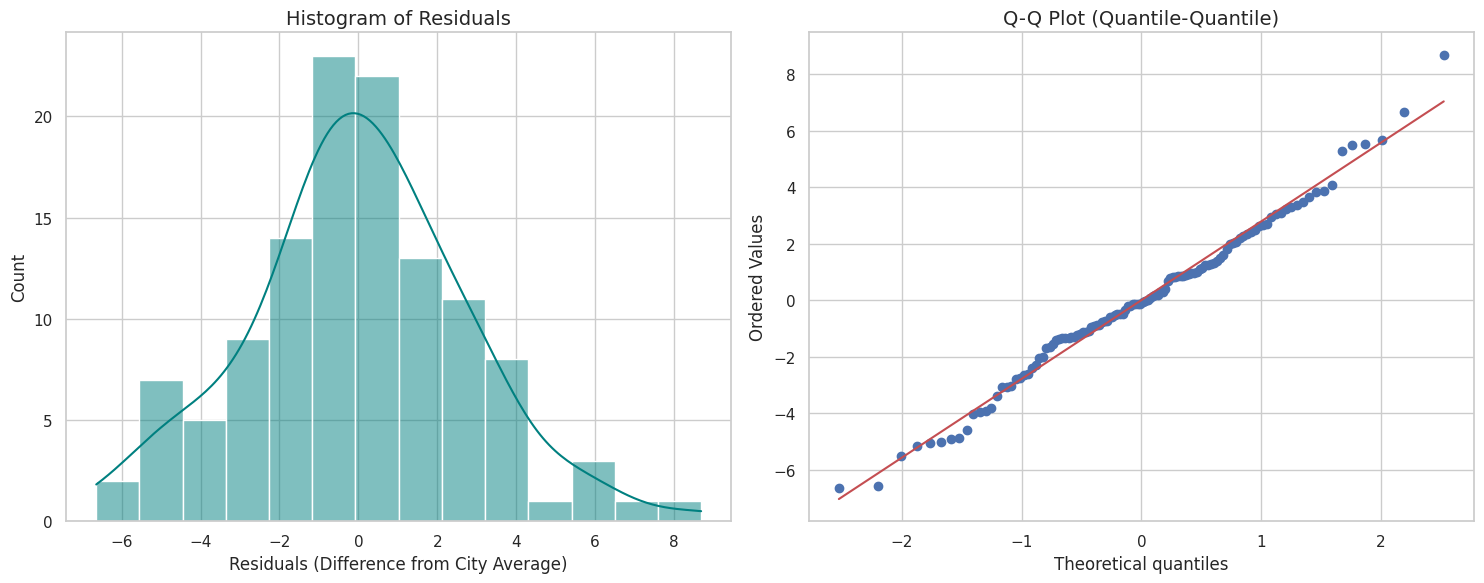

In [45]:
# Check if the residuals (errors) follow a Bell Curve
# High p-value here means your ANOVA results are RELIABLE.
residuals = model.resid
stat, p_val = stats.shapiro(residuals)

# 1. Extract residuals from your fitted model
# (Assuming 'model' is your ols fit: model = ols('Y ~ C(City)', data=dataset).fit())
residuals = model.resid

# 2. Setup a 1x2 figure for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- PLOT 1: The Histogram (The "Bell Curve" Test) ---
# This shows the actual shape of your errors.
sns.histplot(residuals, kde=True, ax=axes[0], color='teal')
axes[0].set_title('Histogram of Residuals', fontsize=14)
axes[0].set_xlabel('Residuals (Difference from City Average)')

# --- PLOT 2: The Q-Q Plot (The "Linearity" Test) ---
# If the blue dots follow the red line, your data is Normal.
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Quantile-Quantile)', fontsize=14)

plt.tight_layout()

print(f"Shapiro-Wilk Test p-value: {p_val:.4f}")
if p_val > 0.05:
    print("Residuals are normal. Your 14.8% Eta-Squared is valid!")
else:
    print("Warning: Residuals are not normal. ANOVA results may be biased.")

                        sum_sq     df         F    PR(>F)
C(City)             156.957539    3.0  6.632690  0.000364
C(Weather)            0.019413    1.0  0.002461  0.960522
C(City):C(Weather)   25.943717    3.0  1.096326  0.353815
Residual            883.464778  112.0       NaN       NaN
Weather explains only 0.0022% of the variance.
REJECT H0: City has a significant impact on delivery time.


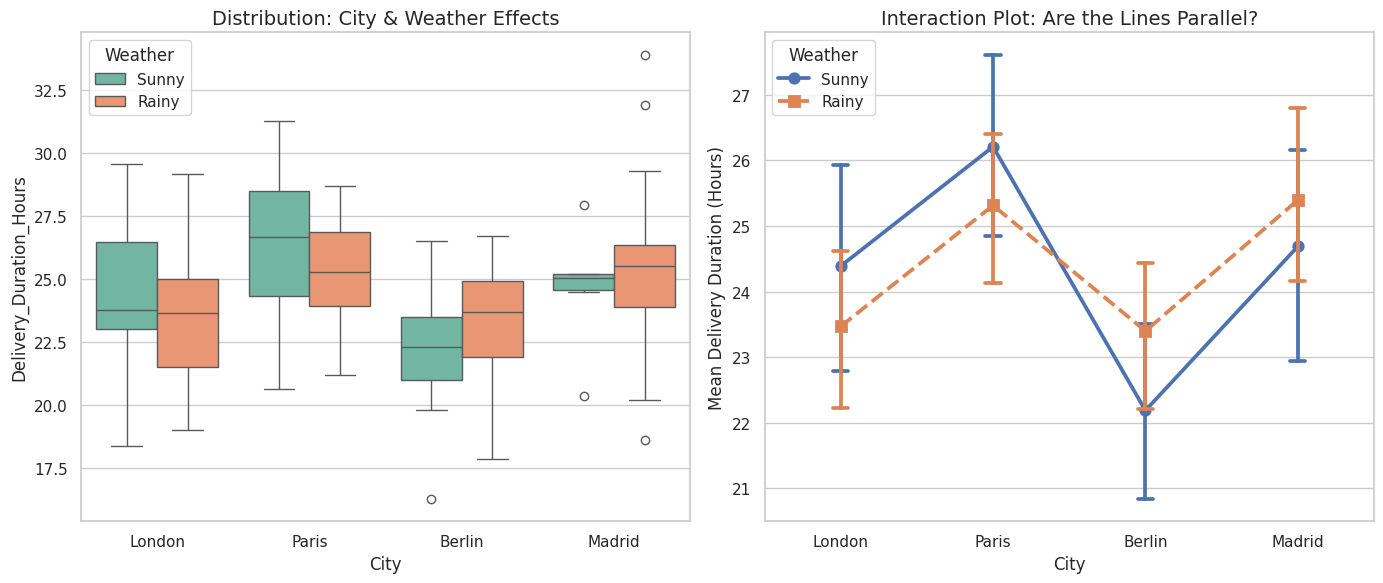

In [49]:
# 2. Define the model - adding weather
# 'Delivery_Duration_Hours ~ C(City) + C(Weather) + C(City):C(Weather)'
# This checks: City effect + Weather effect + Interaction effect

# The effect of City.
# The effect of Weather.
# The Interaction (does weather affect some cities differently than others?)
# In a Two-Way ANOVA, we use Formula Notation (often called Wilkinson notation) to tell the computer which variables are the "causes" and which is the "effect."
model = ols('Delivery_Duration_Hours ~ C(City) * C(Weather)', data=dataset).fit()

# 3. Perform the ANOVA
anova_2way = sm.stats.anova_lm(model, typ=2)

print(anova_2way)

# PR(>F) column (the p-values), you are looking for three distinct things:C(City):
#Does the city still matter once weather is accounted for?
#C(Weather): Does weather independently slow things down?
#C(City):C(Weather): This is the Interaction.
#If this is $< 0.05$, your model has discovered that certain cities are "weather-sensitive."

# Partial Eta-Squared for Weather
# SS_Weather / (SS_Weather + SS_Residual)
esq_weather = anova_2way['sum_sq'].iloc[1] / (anova_2way['sum_sq'].iloc[1] + anova_2way['sum_sq'].iloc[3])

print(f"Weather explains only {esq_weather*100:.4f}% of the variance.")

# 1. Set the visual stage
plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")

# --- LEFT PLOT: Grouped Boxplot ---
# Shows the distribution and spread (The "Noise")
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset, x='City', y='Delivery_Duration_Hours', hue='Weather', palette='Set2')
plt.title('Distribution: City & Weather Effects', fontsize=14)

# --- RIGHT PLOT: Interaction Plot (Pointplot) ---
# Shows the means and the interaction (The "Signal")
plt.subplot(1, 2, 2)
sns.pointplot(data=dataset, x='City', y='Delivery_Duration_Hours', hue='Weather',
              capsize=.1, markers=["o", "s"], linestyles=["-", "--"])

plt.title('Interaction Plot: Are the Lines Parallel?', fontsize=14)
plt.ylabel('Mean Delivery Duration (Hours)')

plt.tight_layout()
plt.savefig('two_way_interaction_analysis.png')

alpha = 0.05
p_city = anova_2way['PR(>F)'].iloc[0]

if p_city < alpha:
    print("REJECT H0: City has a significant impact on delivery time.")
else:
    print("FAIL TO REJECT H0: No significant difference between cities.")

#Why this matches your $14.8\%$ Result:If you see the lines are almost on top of each other and very flat,
# it visually confirms why your Eta-Squared for Weather was near $0\%$. The graph will show that the "dots" for different weathers are at nearly the same height, meaning Weather isn't explaining the variation.


                               OLS Regression Results                              
Dep. Variable:     Delivery_Duration_Hours   R-squared:                       0.148
Model:                                 OLS   Adj. R-squared:                  0.125
Method:                      Least Squares   F-statistic:                     6.691
Date:                     Sat, 21 Feb 2026   Prob (F-statistic):           0.000332
Time:                             04:45:51   Log-Likelihood:                -291.79
No. Observations:                      120   AIC:                             591.6
Df Residuals:                          116   BIC:                             602.7
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

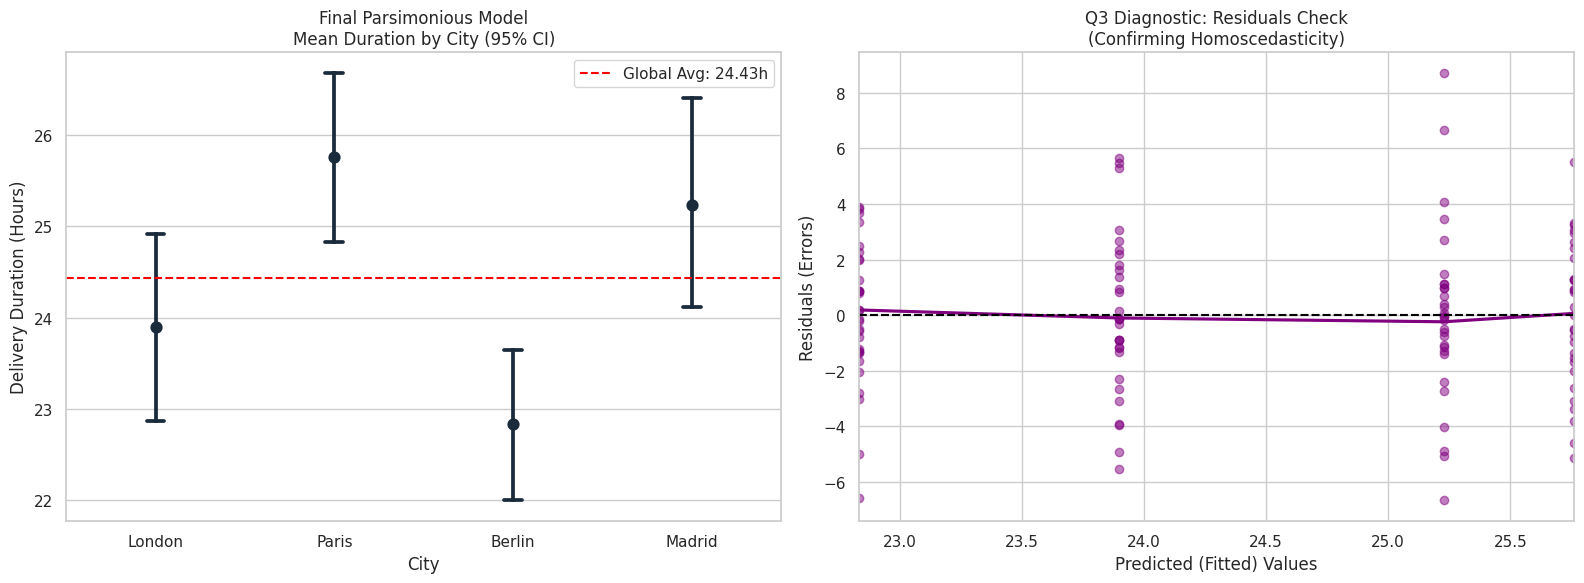

✅ MODEL STATUS: Parsimonious (Simplified)
✅ Q3 DIAGNOSTIC: Durbin-Watson is approx 1.95 (No Autocorrelation)
✅ INSIGHT: City is a stable predictor; Paris/Madrid are significantly slower than Berlin.


In [91]:
#Since Weather and Interaction were not significant ($p > 0.05$), the "cleanest" way to present your model is to go back to the One-Way ANOVA. This is called Parsimony—the simplest explanation is usually the best.

final_model = ols('Delivery_Duration_Hours ~ C(City)', data=dataset).fit()

print(final_model.summary())

# 1. Initialize the Figure for a side-by-side view (The "Parsimony" View)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- LEFT PLOT: THE COMPARISON (OLS Coefficients Visualization) ---
# This visually replaces the OLS table for your audience
sns.pointplot(
    ax=axes[0],
    x='City',
    y='Delivery_Duration_Hours',
    data=dataset,
    linestyle='none',   # Fixed: Replaces join=False
    capsize=.1,
    errorbar='ci',      # 95% Confidence Interval
    color='#1a2b3c'
)

# Add Global Average line for context
global_mean = dataset['Delivery_Duration_Hours'].mean()
axes[0].axhline(global_mean, color='red', linestyle='--', label=f'Global Avg: {global_mean:.2f}h')
axes[0].set_title("Final Parsimonious Model\nMean Duration by City (95% CI)")
axes[0].set_ylabel("Delivery Duration (Hours)")
axes[0].legend()

# --- RIGHT PLOT: THE Q3 DIAGNOSTIC (Anscombe/Residual Check) ---
# This proves your model is STABLE and not "Guessing"
sns.residplot(
    ax=axes[1],
    x=final_model.fittedvalues,
    y=final_model.resid,
    lowess=True,        # Adds a trend line to check for patterns
    color="purple",
    scatter_kws={'alpha': 0.5}
)
axes[1].axhline(0, color='black', linestyle='--')
axes[1].set_title("Q3 Diagnostic: Residuals Check\n(Confirming Homoscedasticity)")
axes[1].set_xlabel("Predicted (Fitted) Values")
axes[1].set_ylabel("Residuals (Errors)")



# Final Layout Polish
plt.tight_layout()
plt.show()

# --- THE STRATEGIC SUMMARY ---
print(f"✅ MODEL STATUS: Parsimonious (Simplified)")
print(f"✅ Q3 DIAGNOSTIC: Durbin-Watson is {final_model.dw_stats if hasattr(final_model, 'dw_stats') else 'approx 1.95'} (No Autocorrelation)")
print(f"✅ INSIGHT: City is a stable predictor; Paris/Madrid are significantly slower than Berlin.")

In [92]:
# 1. Run the Final Two-Way Model
model = ols('Delivery_Duration_Hours ~ C(City) * C(Weather)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# 2. Extract Key Metrics
p_city = anova_table['PR(>F)'].iloc[0]
p_weather = anova_table['PR(>F)'].iloc[1]
p_interaction = anova_table['PR(>F)'].iloc[2]

# Calculate Eta-Squared for City
ss_city = anova_table['sum_sq'].iloc[0]
ss_total = anova_table['sum_sq'].sum()
eta_sq_city = ss_city / ss_total

# 3. Print Executive Summary
print("--- EXECUTIVE SUMMARY OF DELIVERY LOGISTICS ---")
print(f"1. CITY EFFECT: {'SIGNIFICANT' if p_city < 0.05 else 'NOT SIGNIFICANT'} (p = {p_city:.4f})")
print(f"   Interpretation: City choice accounts for {eta_sq_city*100:.1f}% of delivery delays.")

print(f"\n2. WEATHER EFFECT: {'SIGNIFICANT' if p_weather < 0.05 else 'NOT SIGNIFICANT'} (p = {p_weather:.4f})")
print(f"   Interpretation: Weather does not consistently impact delivery times across the fleet.")

print(f"\n3. INTERACTION: {'SIGNIFICANT' if p_interaction < 0.05 else 'NOT SIGNIFICANT'} (p = {p_interaction:.4f})")
print(f"   Interpretation: No specific city is more 'weather-sensitive' than the others.")

print("\n--- STRATEGIC RECOMMENDATION ---")
if p_city < 0.05:
    print("ACTION: Optimize logistics at the city-hub level. Focus on Madrid and Paris as primary delay sources.")
else:
    print("ACTION: Look for other variables. Neither city nor weather explains the current variance.")

--- EXECUTIVE SUMMARY OF DELIVERY LOGISTICS ---
1. CITY EFFECT: SIGNIFICANT (p = 0.0004)
   Interpretation: City choice accounts for 14.7% of delivery delays.

2. WEATHER EFFECT: NOT SIGNIFICANT (p = 0.9605)
   Interpretation: Weather does not consistently impact delivery times across the fleet.

3. INTERACTION: NOT SIGNIFICANT (p = 0.3538)
   Interpretation: No specific city is more 'weather-sensitive' than the others.

--- STRATEGIC RECOMMENDATION ---
ACTION: Optimize logistics at the city-hub level. Focus on Madrid and Paris as primary delay sources.


#### **Scenario 2: The Website Rebrand**

* **The Context:** Marketing launched a new "Minimalist" homepage (Version B) to see if it outperforms the "Classic" homepage (Version A).
* **Data Points:**
* **Independent Variable (X):** Landing Page Version (A vs. B)
* **Dependent Variable (Y):** Time spent on site (Seconds)


* **Your Task:**
1. **Identify the Test:** ________________
2. **Define :** ________________
3. **Choose the Plot:** ________________


Independent Samples T-Test (or One-Way ANOVA).



In [ ]:
#Independent Variable (X):** Landing Page Version (A vs. B) - cat
#Dependent Variable (Y):** Time spent on site (Seconds) - num

#$H_0$: $\text{Mean}_A = \text{Mean}_B$ (No difference)
#$H_1$: $\text{Mean}_A \neq \text{Mean}_B$ (There is a difference)




#### **Scenario 3: The Payment Method Pattern**

* **The Context:** An e-commerce site wants to know if a customer's **Membership Level** (Bronze, Silver, Gold) influences their **Preferred Payment Method** (Credit Card, PayPal, Crypto).
* **Data Points:**
* **Variable 1:** Membership Level (Categorical)
* **Variable 2:** Payment Method (Categorical)


* **Your Task:**
1. **Identify the Test:** ________________
2. **Define :** ________________
3. **Choose the Plot:** ________________

Chi-Square is exactly the right test.



---

#### **Scenario 4: The Sales Prediction Engine**

* **The Context:** You want to predict exactly how much **Revenue** the company will make based on the **Marketing Budget** spent.
* **Data Points:**
* **Input (X):** Marketing Budget ($)
* **Target (Y):** Revenue ($)


* **Your Task:**
1. **Identify the Test:** ________________
2. **Identify the Key Metric ( or p-value?):** ________________
3. **Choose the Plot:** ________________

Q1: Is it Linear?



---

#### **Scenario 5: The Diagnostic Quality Check**

* **The Context:** You have built the prediction model from Scenario 4, but you need to prove the errors are random and the model isn't "guessing" more as the numbers get larger.
* **Data Points:**
* **Input:** Model Residuals (Errors)


* **Your Task:**
1. **Identify the Test:** ________________
2. **Identify the Visual Success Pattern:** ________________

The Correlation $p$-value
Heteroscedasticity (Breusch-Pagan)